## Problem 1
### The graph of a cubic function passes through the points $(-3, 6.8),(0.5,14.5),(2,-21.2)$, and $(5,10)$.

##### (a) Write the cubic expression as $f=ax^3+bx^2+cx+d$ and solve a system of equations to find the coefficients (do NOT use curve-fitting!)

In [1]:
from sympy import * # this way I don't even need to type sp (cuz I'm lazy)

# list of points (x, y)
points = [(-3, 6.8), (0.5, 14.5), (2, -21.2), (5, 10)]

# matrix representation of the system of equations using a nice list comprehension
M = Matrix([[point[0]**3, point[0]**2, point[0], 1, point[1]] for point in points])
display(M)

Matrix([
[  -27,    9,  -3, 1,   6.8],
[0.125, 0.25, 0.5, 1,  14.5],
[    8,    4,   2, 1, -21.2],
[  125,   25,   5, 1,    10]])

To find the coefficients of the cubic equation, we use the included reduce row echelon form (rref) function of the matrix that's included by the sympy library

In [2]:
M_rref = M.rref()
display(M_rref[0])

Matrix([
[1, 0, 0, 0,   1.6],
[0, 1, 0, 0,  -4.4],
[0, 0, 1, 0, -21.2],
[0, 0, 0, 1,  26.0]])

Thus we have our coefficients, and our function is

In [3]:
x = symbols('x')
f = 1.6*x**3 -4.4*x**2 - 21.2*x + 26
display(f)

1.6*x**3 - 4.4*x**2 - 21.2*x + 26

##### (b) Use the symbolic plot command to plot the function on the domain $x \in [-4,6]$

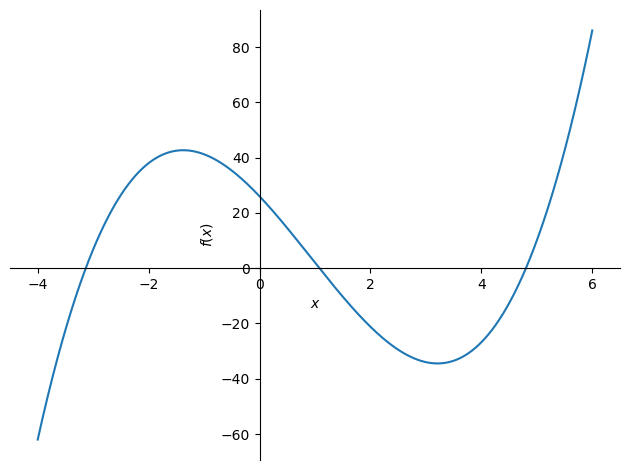

In [4]:
plot(f, (x, -4, 6))

##### (c) Use Python to find the local extrema and the inflection point. Express your answers in point form. Then show that the $x$-coordinate of the inflection point is the average of the $x$-coordinates of the local extrema.

We first calculate the first derivative and set it to 0 to find the critical points

In [5]:
fp = diff(f, x) # first derivative
print(f"the first derivative of the function is {fp}")

crit_pts = solve(fp, x) # solving the first derivative for 0 gives us the critical points

for crit_pt in crit_pts:
  y_val = f.evalf(subs={x: crit_pt}) # y value of the function at the critical point
  print(f"{(crit_pt, y_val)} is a critical point of the function")

the first derivative of the function is 4.8*x**2 - 8.8*x - 21.2
(-1.37613608203293, 42.6718892021985) is a critical point of the function
(3.20946941536627, -34.4681854984948) is a critical point of the function


Then we calculate the second derivative and evaluate it at the critical points to determine if they are local minima or maxima, as well as set it to 0 to find the inflection point(s)

In [6]:
fpp = diff(f, x, 2) # second derivative
print(f"the second derivative of the function is {fpp}")

for crit_pt in crit_pts:
  val_at_cp = fpp.evalf(subs={x: crit_pt})
  if val_at_cp > 0:
    print(f"x = {crit_pt} is a local minimum since the second derivative {val_at_cp} > 0")
  elif val_at_cp < 0:
    print(f"x = {crit_pt} is a local maximum since the second derivative {val_at_cp} < 0")
  elif val_at_cp == 0:
    print(f"We don't know what x = {crit_pt} is, since the second derivative is {val_at_cp} = 0")

the second derivative of the function is 9.6*x - 8.8
x = -1.37613608203293 is a local maximum since the second derivative -22.0109063875162 < 0
x = 3.20946941536627 is a local minimum since the second derivative 22.0109063875162 > 0


In [7]:
infl_pts = solve(fpp, x) # solving the second derivative for 0 gives us the inflection points

for infl_pt in infl_pts:
  y_val = f.evalf(subs={x: infl_pt}) # y value of the function at the inflection point
  print(f"{(infl_pt, y_val)} is an inflection point of the function")

avg_crit_pts = sum(crit_pts) / len(crit_pts) # the arithmetic mean of the x values of the critical points
print(f"{avg_crit_pts} is the arithmetic mean of the x values of the critical points")

print("By inspection, they look the same, but in general it is bad practice to check for equality of floats")
print(f"For instance if you evaluate (0.1+0.2) == 0.3 you get {(0.1+0.2) == 0.3}")

(0.916666666666667, 4.10185185185185) is an inflection point of the function
0.916666666666667 is the arithmetic mean of the x values of the critical points
By inspection, they look the same, but in general it is bad practice to check for equality of floats
For instance if you evaluate (0.1+0.2) == 0.3 you get False


##### (d) Find the equation of the line tangent to the curve at $x=2$ and replot the curve and the tangent line on the same axes

The slope of the tangent line at $x=2$ is just the derivative evaluated at $x=2$. We can then find the equation of the line by solving for the constant term that matches the function at the same point.

In [8]:
slope = fp.evalf(subs={x: 2})
y_val = f.evalf(subs={x: 2})
const_term = y_val - slope*2
tan_line_at_2 = slope*x + const_term
print(f"The tangent line at x=2 is {tan_line_at_2}")

The tangent line at x=2 is 18.0 - 19.6*x


In [9]:
p1 = plot(f, (x, -4, 6), show=False, legend = True, label='f(x)')
p2 = plot(tan_line_at_2, (x, -4, 6), show=False, legend = True, label='tangent line at x=2')
p1.append(p2[0])
p1.show()

## Problem 2
### Given the functions $f(x) = x^3-x^2 -2x+1$ and $g(x) = x^2-2$ (NOTE: approximate answers are sufficient):

#### (a) Plot both functions and the line $y=2$ on the same set of axes using the domain $x \in [-2, 3]$.

In [10]:
f = x**3 - x**2 -2*x + 1
g = x**2 - 2
p1 = plot(f, (x, -2, 3), show=False, legend=True, label='f(x)')
p2 = plot(g, (x, -2, 3), show=False, legend=True, label='g(x)')
p3 = plot(2, [x, -2, 3], show=False, legend=True, label='y=2')
p1.append(p2[0])
p1.append(p3[0])
p1.show()

#### (b) Find (approximately) the total area of the regions bounded by these functions.

First let's find the points of intersection of the two functions.

In [11]:
meet_pts = solve(f - g, x) # solving the equation f(x) - g(x) = 0 gives us the points where they intersect
for meet_pt in meet_pts:
    y_val = f.evalf(subs={x: meet_pt}) # y value of the function at the meeting point
    print(f"{(meet_pt, y_val)} is an intersection point of the functions f and g")

(1, -1.00000000000000) is an intersection point of the functions f and g
(1/2 - sqrt(13)/2, -0.302775637731995) is an intersection point of the functions f and g
(1/2 + sqrt(13)/2, 3.30277563773199) is an intersection point of the functions f and g


We see that the intersection points are not from left to right, so we first sort them. Then, we can integrate the difference of the two functions from the sorted points to find the area.

In [12]:
meet_pts.sort() # sorting the intersection points from left to right

# finding the area between two curves
area1 = integrate(f - g, (x, meet_pts[0], meet_pts[1]))
print(f"The left area bounded by the curves f and g is {(area1).evalf()}")
area2 = integrate(g - f, (x, meet_pts[1], meet_pts[2]))
print(f"The right area bounded by the curves f and g is {(area2).evalf()}")
print(f"The total area bounded by the curves f and g is {(area1 + area2).evalf()}")

The left area bounded by the curves f and g is 4.99467360754299
The right area bounded by the curves f and g is 1.08865972579034
The total area bounded by the curves f and g is 6.08333333333333


#### (c) Find the volume obtained by rotating the first region about the line y=2

This is finding the volume of the solid of revolution to the axis of rotation ($y=2$). We find this using the washer method, where $$V = \pi \int_a^b{(R^2 - r^2)dx},$$
where $R$ is the outer radius, and $r$ is the inner radius. In this case we see from the graph that $2-g$ is the outer radius and $2-f$ is the inner radius.

In [13]:
R = 2 - g
r = 2 - f
V1 = pi * integrate(R**2 - r**2, (x, meet_pts[0], meet_pts[1]))
print(f"The volume of the solid of revolution is {(V1).evalf()}")

The volume of the solid of revolution is 73.3384072392264


As a bonus, we can even plot this solid by using the `plot_3d_parametric_surface` function:

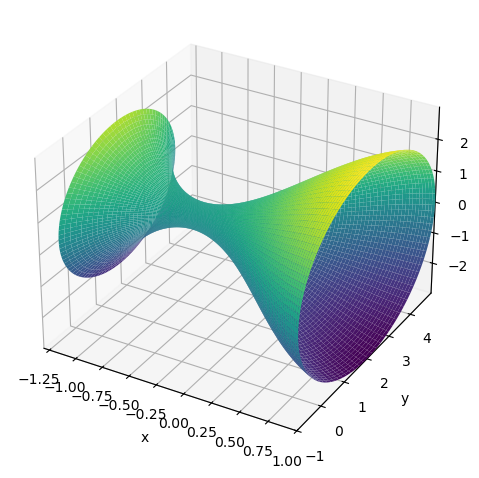

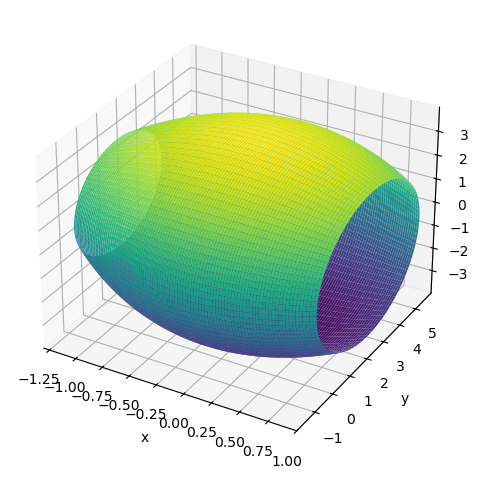

In [14]:
from sympy.plotting import plot3d_parametric_surface # apparently the original import didn't include this function

t = symbols('t')

# parametric equations for f
X_f = x
Y_f = 2 + (f-2)*cos(t)
Z_f = (f-2)*sin(t)

surf_f = plot3d_parametric_surface(
    X_f, Y_f, Z_f,
    (x, meet_pts[0], meet_pts[1]),
    (t, 0, 2*pi),
)

# parametric equations for g
X_g = x
Y_g = 2 + (g-2)*cos(t)
Z_g = (g-2)*sin(t)

surf_g = plot3d_parametric_surface(
    X_g, Y_g, Z_g,
    (x, meet_pts[0], meet_pts[1]),
    (t, 0, 2*pi),
)

#### (d) Find the volume obtained by rotating the second region about the $y$-axis.

Again we want to find the volume of a solid of revolution to a different axis of rotation ($x=0$). In this case, the shell method is more appropriate, where $$V = 2\pi \int_a^b{r(x)h(x)dx},$$ 
and $r(x)$ is the distance from the axis of rotation to $x$, and $h(x)$ is the height of the solid at $x$. In our case, $r(x) = x$ and $h(x) = g(x) - f(x)$.

In [15]:
r = x
h = g - f
V2 = 2*pi * integrate(r * h, (x, meet_pts[1], meet_pts[2]))
print(f"The volume of the solid of revolution is {(V2).evalf()}")

The volume of the solid of revolution is 11.4923996945017


We can also plot this as well:

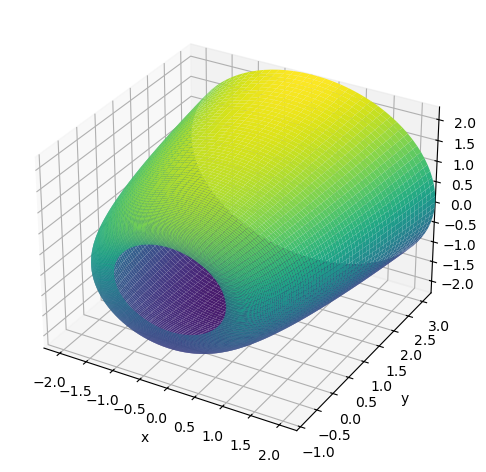

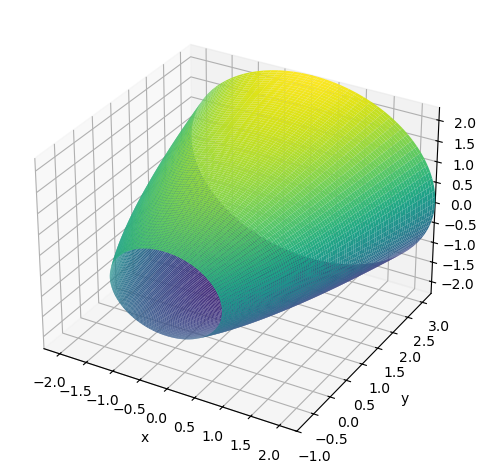

In [16]:
# parametric equations for the lower-curve f(x)
X_f = x*cos(t)
Y_f = f
Z_f = x*sin(t)

surf_f = plot3d_parametric_surface(
    X_f, Y_f, Z_f,
    (x, meet_pts[1], meet_pts[2]),
    (t, 0, 2*pi),
)

# parametric equations for the upper-curve g(x)
X_g = x*cos(t)
Y_g = g
Z_g = x*sin(t)

surf_g = plot3d_parametric_surface(
    X_g, Y_g, Z_g,
    (x, meet_pts[1], meet_pts[2]),
    (t, 0, 2*pi),
)

## Problem 3 
### Given the power series $\sum_{n=0}^\infty{\frac{(-1)^n(\ln(2)\cdot x)^n}{n!}}$:

#### (a) Let $x = \frac{1}{2}$. Plot the first 21 terms of the series and the first 21 partial sums on the same axes ($n=0$ to $n=20$).

It looks like the default `plot` function in sympy doesn't allow us to plot coordinates, so we will use matplotlib to plot them instead

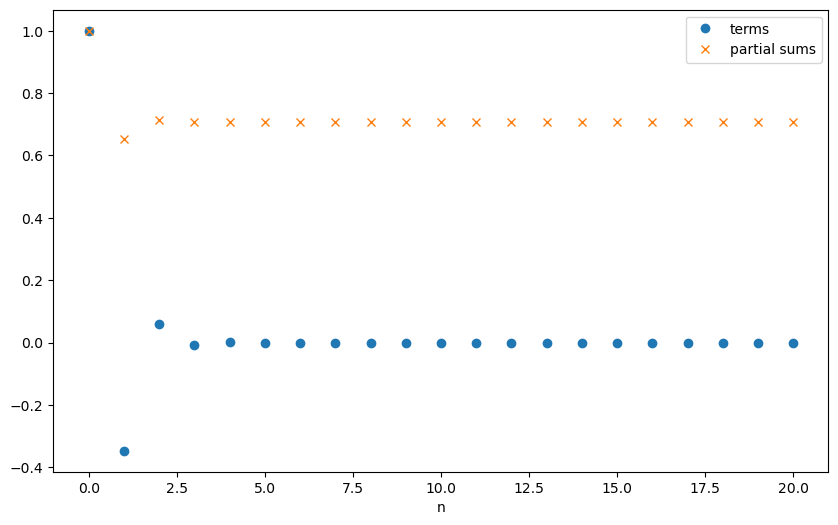

In [17]:
import matplotlib.pyplot as plt

n_range = range(21)  # n from 0 to 20
terms = [(-1)**n * (ln(2)*0.5)**n / factorial(n) for n in n_range] # first 21 terms of the series
partial_sums = [sum(terms[:n+1]) for n in n_range] # first 21 partial sums of the series

plt.figure(figsize=(10, 6))
plt.plot(n_range, terms, 'o', label="terms")
plt.plot(n_range, partial_sums, 'x', label=f"partial sums")
plt.xlabel('n')
plt.legend()
plt.show()

#### (b) Continue with $x=\frac{1}{2}$. Determine the number of terms needed to sum the series to within $10^{-8}$. Find this approximation and the exact sum of the series to verify this.
#### (**HINT**: you will not be able to solve or nsolve the error bound equation, so replot the terms with an appropriate $y$-range to graphically find the number of terms).

This power series looks suspiciously similar to that of 
$$e^x = \sum_{n=0}^\infty {\frac{x^n}{n!}},$$
and we can rewrite it to
$$\sum_{n=0}^\infty {\frac{-(\ln(2)x)^n}{n!}}$$
which is just
$$ e^{-\ln(2)x} = 2^{-x}.$$
To find the error, we can use the alternating-series bound
$$ |S - S_N| \le |a_{N+1}|, $$
and find the smallest $N$ for which
$$|a_{N+1}| = \frac{(\frac{1}{2}\ln(2))^{N+1}}{(N+1)!} \le 10^{-8}$$

c:\ProgramData\Anaconda3\Lib\site-packages\sympy\plotting\series.py:73: UserWarning: The evaluation with NumPy/SciPy failed.
ValueError: Unsupported datatype for factorial: <class 'complex'>
Permitted data types are integers and floating point numbers
Trying to evaluate the expression with Sympy, but it might be a slow operation.
  warnings.warn(


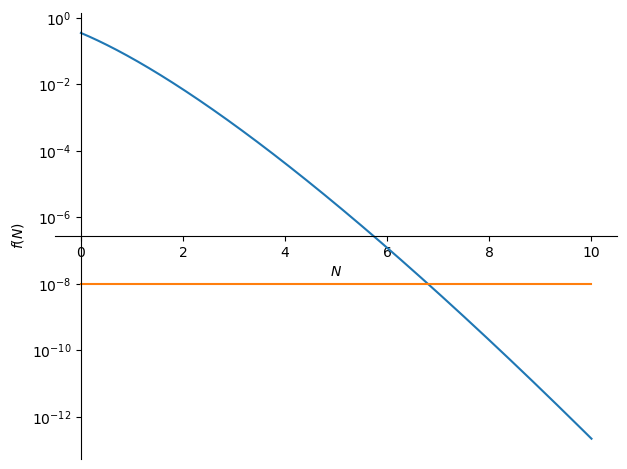

In [18]:
exact_sum = 2**(-1/2) # exact value of the series when x = 0.5
N = symbols('N')
abs_a_N_p1 = (1/2*ln(2))**(N+1)/(factorial(N+1))
p0 = plot(abs_a_N_p1, (N, 0, 10), show=False, yscale='log') # plotting with log scale in order to actually see the intersection
p1 = plot(10**(-8), (N, 0, 10), show=False, yscale='log')
p0.append(p1[0])
p0.show()

We see that on the graph, the error gets to $10^{-8}$ a little before $N=7$, so with $N=7$, the error will be less than $10^{-8}$. We can numerically verify this in python:

In [19]:
error6 = Abs(partial_sums[6] - exact_sum)
print(f"The error with 6 partial sums is {error6.evalf()}")
error7 = Abs(partial_sums[7] - exact_sum)
print(f"The error with 7 partial sums is {error7.evalf()}")

The error with 6 partial sums is 1.14191795410309E-7
The error with 7 partial sums is 4.97018743390827E-9


#### (c) For general $x$, simplify $\left| \frac{a_n+1}{a_n}\right|$, find the limit, and state the radius of convergence.

$\left| \frac{a_n+1}{a_n}\right|$ is

In [20]:
n = symbols('n')
a_n = (-x*ln(2))**(n)/(factorial(n))
a_n_p1 = (-x*ln(2))**(n+1)/(factorial(n+1))
abs_ratio = simplify(Abs(a_n_p1/a_n))
display(abs_ratio)

log(2)*Abs(x/(n + 1))

The limit as $n \to \infty$ is:

In [21]:
limit(abs_ratio, n, oo)

0

Since the $\lim_{n \to \infty} |a_{n+1}/a_n| = 0 < 1$, the series converges absolutely, so the radius of convergence is $\infty$.

#### (d) It can be shown that the series converges to $f(x) = 2^{-x}$ on its interval of convergence. To illustrate this, find $s_3$, $s_5$, and $s_{10}$. Plot these three polynomials and $f$ on the same set of axes in the window $x \in [-10, 10]$ with default range.

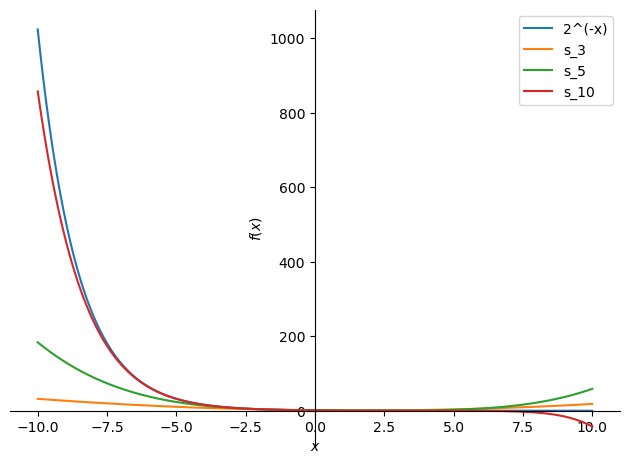

In [22]:
f = 2**(-x)

# partial sums using the sum function and list comprehension
s_3 = sum([a_n.subs({n: i}) for i in range(3)])
s_5 = sum([a_n.subs({n: i}) for i in range(5)])
s_10 = sum([a_n.subs({n: i}) for i in range(10)])

p0 = plot(f, (x, -10, 10), show=False, legend = True, label='2^(-x)')
p1 = plot(s_3, (x, -10, 10), show=False, legend = True, label='s_3')
p2 = plot(s_5, (x, -10, 10), show=False, legend = True, label='s_5')
p3 = plot(s_10, (x, -10, 10), show=False, legend = True, label='s_10')
p0.append(p1[0])
p0.append(p2[0])
p0.append(p3[0])

p0.show()

## Problem 4
### Choose any topic in the 151 or 152 Overviews. Write a (nonroutine!) Python question that uses this topic (you may not use the problems in this assignment, the Overview, or any posted on the 151/152 Lab schedule page!). Enter the problem in the markdown area of the template (use links to diagrams if needed) and give the code to solve the problem.

So much of lab is very theoretical without practical examples, so I think it's useful to do an application for this. This might be a bit more electrical engineering than math, but we're going to basically implement a bandpass filter to an audio file (Neil Armstrong's moon landing speech) in order to remove the noise from it. The math involved is really just applying two integrals. The first is the Fourier transform on the audio file which allows us to remove the unwanted frequencies. The second is the inverse transform to get the processed audio file back.

In [23]:
# first we install some libraries we will need, and download the audio clip that we're going to use
%pip install librosa
%pip install soundfile
import urllib.request
url = "https://science.nasa.gov/wp-content/uploads/2024/04/sounds-of-mars-one-small-step-earth.wav"
filename = "sounds-of-mars-one-small-step-earth.wav"
urllib.request.urlretrieve(url, filename)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


('sounds-of-mars-one-small-step-earth.wav',
 <http.client.HTTPMessage at 0x292cbeea2a0>)

Now we use the IPython library in order to play the audio in order to play it in this notebook.

In [24]:
import IPython
IPython.display.Audio("sounds-of-mars-one-small-step-earth.wav")

As we can hear, the clip is pretty noisy. We'll now use the librosa library to get the Fourier transform of the audio, and then apply frequency filters, and then perform an inverse Fourier transform to get back to an audio file.

c:\ProgramData\Anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\ProgramData\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\ProgramData\Anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


Text(0, 0.5, 'Amplitude')

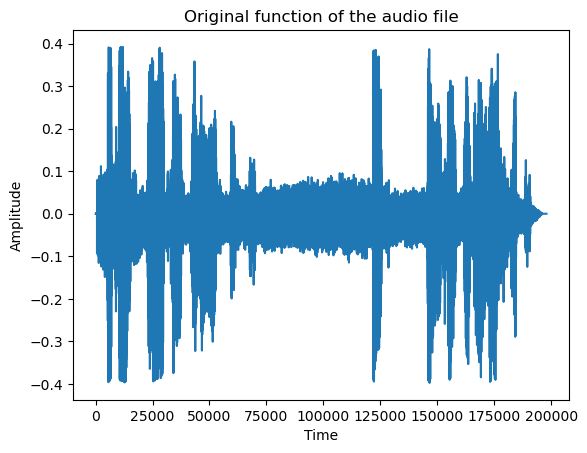

In [25]:
import librosa
import soundfile
import numpy as np

# load the clip
y, sr = librosa.load('sounds-of-mars-one-small-step-earth.wav')

plt.plot(y)
plt.title('Original function of the audio file')
plt.xlabel('Time')
plt.ylabel('Amplitude')

This graph roughly only tells us which parts of the audio clip is loud, but not really that informative about the frequencies present. For this we will perform a Fourier transform which will give us the frequency information. The math of the Fourier transform is
$$ \hat{f}(\xi) = \int_{-\infty}^{\infty} f(x) e^{-i 2 \pi \xi x}dx, \quad \forall \xi \in \R,$$
which is a pain to compute the usual way, but thankfully there are very optimized algorithms that can do it efficiently, which is what librosa uses. We can show a nice graph of the frequency information.

Text(0, 0.5, 'Frequency (Hz)')

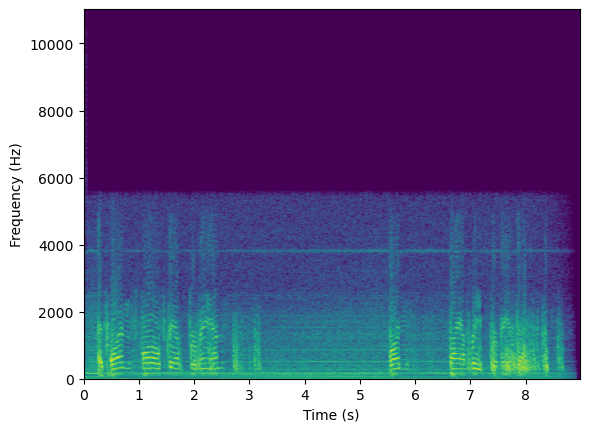

In [26]:
# perform the fourier transform
n_fft = 2048
hop_length = n_fft // 4
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure()
plt.imshow(S_db, aspect='auto', origin='lower', extent=[0, len(y)/sr, 0, librosa.fft_frequencies(sr=sr)[-1]])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

As one can see, this frequencies of the audio clip is mostly in the 0 to 6000 Hz region, while human speech typically range from 100 Hz to 3000 Hz.
Thus we can apply some filters to only keep the frequency terms for speech, which hopefully removes some of the noise. Then we apply the inverse Fourier transform to get back to an audio function
$$f(x) = \int_{-\infty}^{\infty}\hat{f}(\xi)e^{i 2 \pi \xi x}d \xi, \quad \forall x \in \R,$$
which again librosa can calculate it very efficiently.

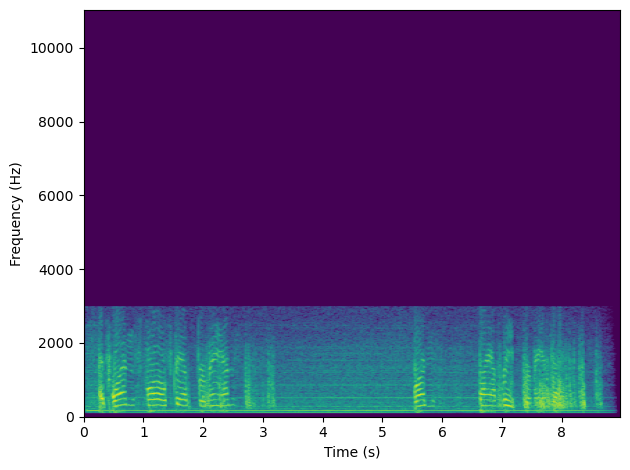

In [27]:
# values for the cutoffs, feel free to change these to see how the audio changes
low_cutoff = 100
high_cutoff = 3000
freqs = np.linspace(0, sr/2, int(1 + n_fft//2))  # positive‐frequency bins
# create a boolean mask: True where freq is within [low_cutoff, high_cutoff]
passband = (freqs >= low_cutoff) & (freqs <= high_cutoff)
# mask has length n_fft//2 + 1; we need to apply to both positive and negative freq bins
# build a full‐spectrum mask of shape (n_fft//2+1, ), then broadcast onto D
full_mask = np.zeros_like(D, dtype=bool)
full_mask[passband, :] = True

# apply the filter to the result
D_filtered = D.copy()
D_filtered[~full_mask] = 0.0

# convert back to the time domain (inverse Fourier transform)
y_filtered = librosa.istft(D_filtered, hop_length=hop_length, length=len(y))

# we now plot the frequencies after applying the filter
plt.figure()
S_db_filtered = librosa.amplitude_to_db(np.abs(D_filtered), ref=np.max)
plt.imshow(S_db_filtered, aspect='auto', origin='lower', extent=[0, len(y)/sr, 0, librosa.fft_frequencies(sr=sr)[-1]])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

# play the filtered audio
soundfile.write("filtered_audio.wav", y_filtered, sr)
IPython.display.Audio("filtered_audio.wav")